In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('https://health-infobase.canada.ca/src/data/covidLive/covid19.csv', encoding = "ISO-8859-1", error_bad_lines=False)

In [3]:
df.tail()

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
7177,60,Yukon,Yukon,28-06-2021,1.0,308,NaN,4.0,308,NaN,...,4.76,121.0,287.74,1.0,2.38,17.0,41.11,0.0,0.34,0.00
7178,61,Northwest Territories,Territoires du Nord-Ouest,28-06-2021,1.0,128,NaN,0.0,128,NaN,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
7179,62,Nunavut,Nunavut,28-06-2021,1.0,657,NaN,4.0,657,NaN,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
7180,99,Repatriated travellers,Voyageurs rapatriÃ©s,28-06-2021,NaN,13,NaN,0.0,13,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
7181,1,Canada,Canada,28-06-2021,NaN,1414134,NaN,26238.0,1414134,NaN,...,0.78,4555.0,11.99,154.0,0.41,651.0,1.71,22.0,0.06,4.55


In [4]:
df.isnull().sum()

pruid                     0
prname                    0
prnameFR                  0
date                      0
update                 4764
numconf                   0
numprob                 870
numdeaths               119
numtotal                  0
numtested              2277
numtests                  0
numrecover              524
percentrecover          728
ratetested             2616
ratetests               548
numtoday                  0
percentoday               0
ratetotal               475
ratedeaths              475
numdeathstoday          119
percentdeath            397
numtestedtoday         2277
numteststoday            72
numrecoveredtoday       524
percentactive           397
numactive               397
rateactive              475
numtotal_last14         252
ratetotal_last14        714
numdeaths_last14        252
ratedeaths_last14       714
numtotal_last7          252
ratetotal_last7         714
numdeaths_last7         252
ratedeaths_last7        715
avgtotal_last7      

In [5]:
df.shape

(7182, 40)

In [6]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [7]:
df['num7davg'] = df['numtotal_last7'] / 7

In [8]:
#df.dtypes
df.tail()

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered,num7davg
7177,60,Yukon,Yukon,2021-06-28,1.0,308,NaN,4.0,308,NaN,...,121.0,287.74,1.0,2.38,17.0,41.11,0.0,0.34,0.00,17.285714
7178,61,Northwest Territories,Territoires du Nord-Ouest,2021-06-28,1.0,128,NaN,0.0,128,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.000000
7179,62,Nunavut,Nunavut,2021-06-28,1.0,657,NaN,4.0,657,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.000000
7180,99,Repatriated travellers,Voyageurs rapatriÃ©s,2021-06-28,NaN,13,NaN,0.0,13,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.000000
7181,1,Canada,Canada,2021-06-28,NaN,1414134,NaN,26238.0,1414134,NaN,...,4555.0,11.99,154.0,0.41,651.0,1.71,22.0,0.06,4.55,650.714286


In [9]:
col_list = ['prname', 'date', 'numtoday', 'numtotal', 'numtotal_last7', 
            'numtotal_last14', 'numdeathstoday', 'numrecover', 'numrecoveredtoday','num7davg']

In [10]:
f = (df['prname'] == 'Canada')
df_today = df.loc[f, col_list]
f2 = df['prname'] == 'Ontario'
df_on_today = df.loc[f2, col_list]
#
fab = df['prname'] == 'Alberta'
df_ab_today = df.loc[fab, col_list]
#
fqc = df['prname'] == 'Quebec'
df_qc_today = df.loc[fqc, col_list]



In [11]:
df_on_today = df_on_today.set_index('date')

In [12]:
df_today.set_index('date', inplace=True)

In [13]:
# df = df[["C", "A", "B"]]
# or
#column_names = ["C", "A", "B"]
# df = df.reindex(columns=column_names)

# df_today.columns

In [14]:
#cn = ['prname', 'numtoday', 'numtotal', 'numtotal_last7', 'num7davg', 'numtotal_last14',
#       'numdeathstoday', 'numrecover']
#df_today = df_today.reindex(columns=cn)

In [15]:
# Re-order Columns
df_today = df_today[['prname', 'numtoday', 'numtotal', 'numtotal_last7', 'num7davg', 'numtotal_last14',
       'numdeathstoday', 'numrecover', 'numrecoveredtoday']]

In [16]:
df_today

,prname,numtoday,numtotal,numtotal_last7,num7davg,numtotal_last14,numdeathstoday,numrecover,numrecoveredtoday
date,,,,,,,,,
2020-01-31,Canada,4,4,NaN,NaN,NaN,0.0,NaN,NaN
2020-02-08,Canada,3,7,NaN,NaN,NaN,0.0,NaN,NaN
2020-02-16,Canada,1,8,NaN,NaN,NaN,0.0,NaN,NaN
2020-02-21,Canada,1,9,NaN,NaN,NaN,0.0,NaN,NaN
2020-02-24,Canada,1,10,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-06-24,Canada,708,1411633,5387.0,769.571429,13341.0,17.0,1376098.0,991.0
2021-06-25,Canada,668,1412301,5043.0,720.428571,12584.0,5.0,1376904.0,806.0
2021-06-26,Canada,668,1412969,4752.0,678.857143,11867.0,17.0,1377730.0,826.0


In [17]:
df_ab_today.set_index('date', inplace=True)
df_qc_today.set_index('date', inplace=True)

Canada - Cases and Deaths - Last 5 days
            numtoday  numdeathstoday
date                                
2021-06-24       708            17.0
2021-06-25       668             5.0
2021-06-26       668            17.0
2021-06-27       505            13.0
2021-06-28       660            11.0

Ontario
            numtoday  numdeathstoday
date                                
2021-06-24       296             6.0
2021-06-25       256             2.0
2021-06-26       346            13.0
2021-06-27       287            12.0
2021-06-28       210             3.0


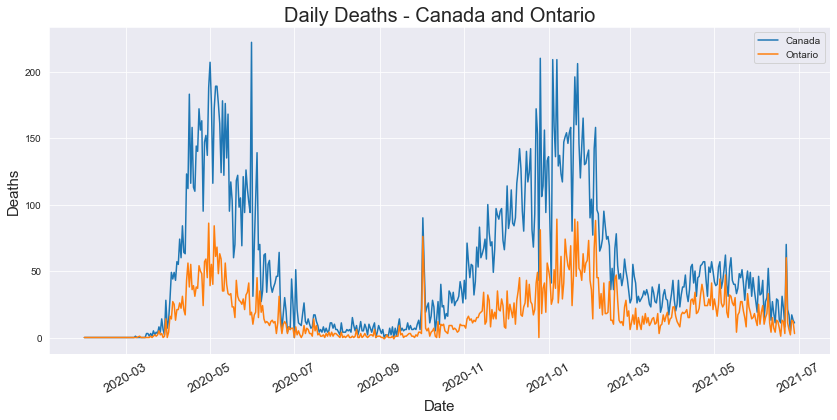

In [18]:
print('Canada - Cases and Deaths - Last 5 days')
print(df_today[['numtoday','numdeathstoday']].tail())
print("")
print('Ontario')
print(df_on_today[['numtoday','numdeathstoday']].tail())
plt.figure(figsize=(14,6))
plt.title('Daily Deaths - Canada and Ontario', fontsize=20)
plt.ylabel('Deaths', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=30, fontsize=13)
sns.lineplot(data=df_today['numdeathstoday'], label='Canada')
sns.lineplot(data=df_on_today['numdeathstoday'], label='Ontario')
plt.show()

In [19]:
df_today['numtoday'].tail(15)

date
2021-06-14     949
2021-06-15     807
2021-06-16    1048
2021-06-17    1107
2021-06-18    1012
2021-06-19     959
2021-06-20     802
2021-06-21     560
2021-06-22     621
2021-06-23     725
2021-06-24     708
2021-06-25     668
2021-06-26     668
2021-06-27     505
2021-06-28     660
Name: numtoday, dtype: int64

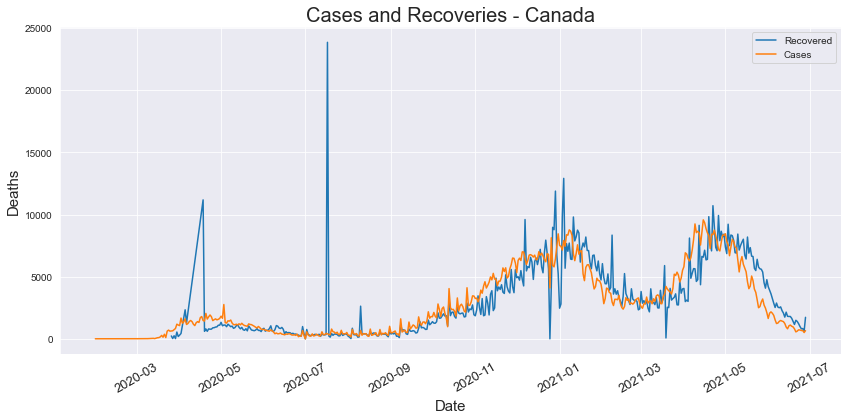

In [20]:
plt.figure(figsize=(14,6))
plt.title('Cases and Recoveries - Canada', fontsize=20)
plt.ylabel('Deaths', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=30, fontsize=13)
sns.lineplot(data=df_today['numrecoveredtoday'], label='Recovered')
sns.lineplot(data=df_today['numtoday'], label='Cases')
plt.show()

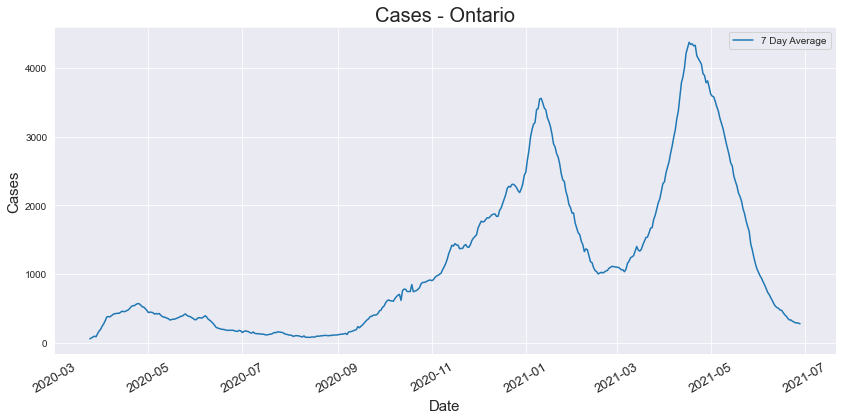

In [21]:
plt.figure(figsize=(14,6))
plt.title('Cases - Ontario', fontsize=20)
plt.ylabel('Cases', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=30, fontsize=13)
#sns.lineplot(data=df_on_today['numrecoveredtoday'], label='Daily Count')
sns.lineplot(data=df_on_today['num7davg'], label='7 Day Average')
plt.show()

In [22]:
fmore = (df['prname'] == 'Quebec') | (df['prname'] == 'Ontario') | (df['prname'] == 'Canada')
df_more_today = df.loc[fmore, col_list]

In [23]:
df_more_today.describe()

,numtoday,numtotal,numtotal_last7,numtotal_last14,numdeathstoday,numrecover,numrecoveredtoday,num7davg
count,1464.000000,1.464000e+03,1386.000000,1386.000000,1464.000000,1.341000e+03,1341.00000,1386.000000
mean,1593.721311,2.693604e+05,11760.326118,23487.315296,31.809426,2.644917e+05,1703.40865,1680.046588
std,1924.928746,3.335977e+05,13438.141132,26724.106544,38.899926,3.207155e+05,2200.00064,1919.734447
min,0.000000,1.000000e+00,313.000000,554.000000,-1.000000,0.000000e+00,0.00000,44.714286
25%,318.000000,4.979875e+04,2727.250000,5429.000000,5.000000,4.811600e+04,327.00000,389.607143
50%,902.000000,1.272710e+05,6994.500000,13803.500000,17.000000,1.310980e+05,920.00000,999.214286
75%,1983.750000,3.479505e+05,15296.000000,30319.000000,43.000000,3.386280e+05,2092.00000,2185.142857
max,9570.000000,1.414134e+06,61113.000000,119808.000000,222.000000,1.380080e+06,23853.00000,8730.428571


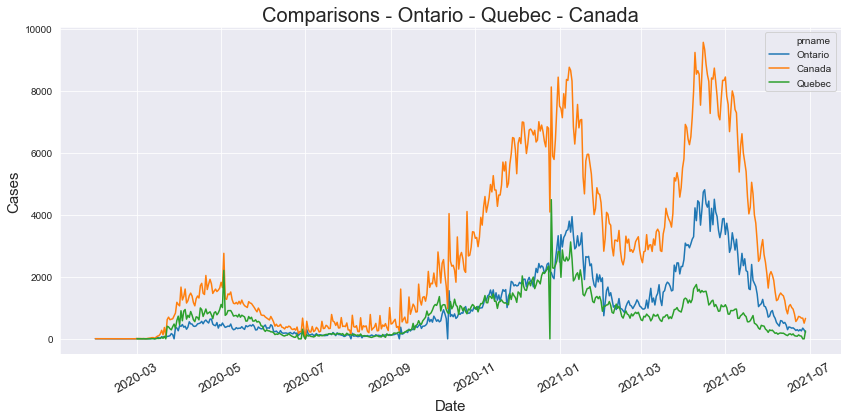

In [24]:
plt.figure(figsize=(14,6))
plt.title('Comparisons - Ontario - Quebec - Canada', fontsize=20)
plt.xticks(rotation=30, fontsize=13)
sns.lineplot(data=df_more_today, x="date", y="numtoday", hue="prname")
plt.ylabel('Cases', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

In [25]:
fatlantic = (df['prname'] == 'Prince Edward Island') | (df['prname'] == 'New Brunswick') | (df['prname'] == 'Nova Scotia') | (df['prname'] == 'Newfoundland and Labrador')
df_atlantic = df.loc[fatlantic, col_list]

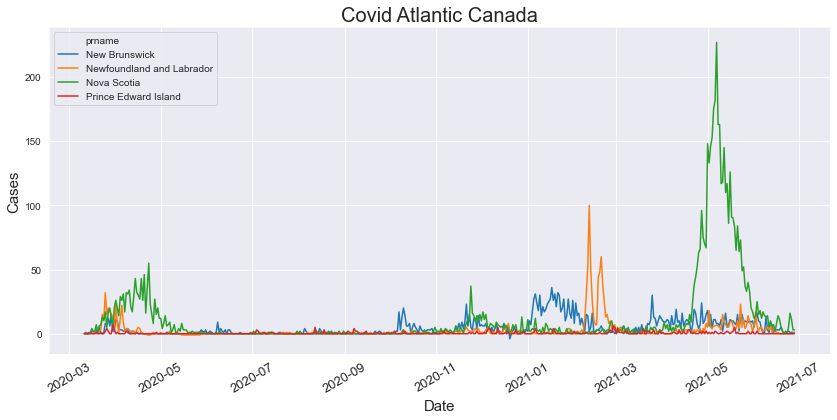

In [26]:
plt.figure(figsize=(14,6))
plt.title('Covid Atlantic Canada', fontsize=20)
plt.xticks(rotation=30, fontsize=13)
sns.lineplot(data=df_atlantic, x="date", y="numtoday", hue="prname")
plt.ylabel('Cases', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

In [27]:
fwest = (df['prname'] == 'British Columbia') | (df['prname'] == 'Alberta') | (df['prname'] == 'Saskatchewan') | (df['prname'] == 'Manitoba')
df_west = df.loc[fwest, col_list]

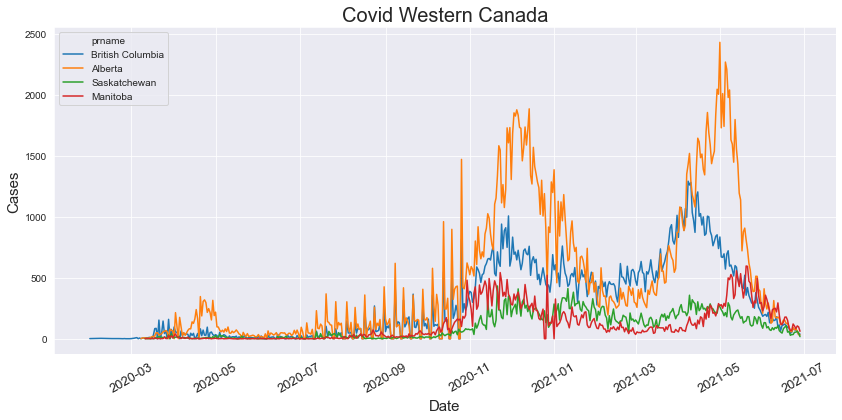

In [28]:
plt.figure(figsize=(14,6))
plt.title('Covid Western Canada', fontsize=20)
plt.xticks(rotation=30, fontsize=13)
sns.lineplot(data=df_west, x="date", y="numtoday", hue="prname")
plt.ylabel('Cases', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

In [29]:
#'Northwest Territories', 'Nunavut', 'Yukon'


In [30]:
fnorth = (df['prname'] == 'Northwest Territories') | (df['prname'] == 'Nunavut') | (df['prname'] == 'Yukon')
df_north = df.loc[fnorth, col_list]

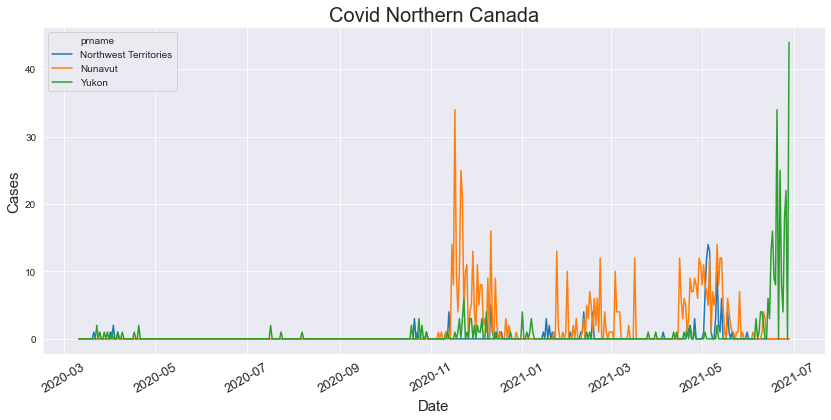

In [31]:
plt.figure(figsize=(14,6))
plt.title('Covid Northern Canada', fontsize=20)
plt.xticks(rotation=30, fontsize=13)
sns.lineplot(data=df_north, x="date", y="numtoday", hue="prname")
plt.ylabel('Cases', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()